<a href="https://colab.research.google.com/github/likitha888/python/blob/main/Function_Optimization(PSO)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

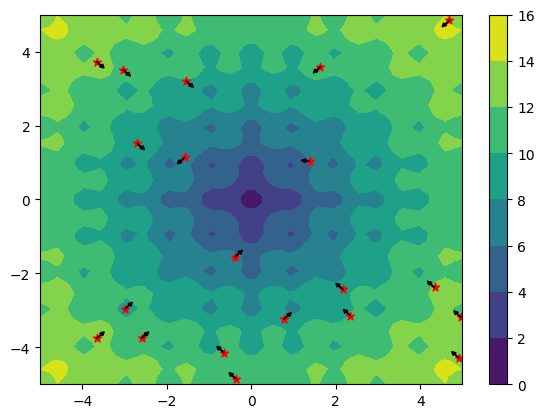

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

The swarm has met convergence criteria after 68 iterrations.


In [2]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

DIMENSIONS = 2              # Number of dimensions
GLOBAL_BEST = 0             # Global Best of Cost function
B_LO = -5                   # Upper boundary of search space
B_HI = 5                    # Upper boundary of search space

POPULATION = 20             # Number of particles in the swarm
V_MAX = 0.1                 # Maximum velocity value
PERSONAL_C = 2.0            # Personal coefficient factor
SOCIAL_C = 2.0              # Social coefficient factor
CONVERGENCE = 0.001         # Convergence value
MAX_ITER = 100              # Maximum number of iterrations

# Particle class
class Particle():
    def __init__(self, x, y, z, velocity):
        self.pos = [x, y]
        self.pos_z = z
        self.velocity = velocity
        self.best_pos = self.pos.copy()

class Swarm():
    def __init__(self, pop, v_max):
        self.particles = []             # List of particles in the swarm
        self.best_pos = None            # Best particle of the swarm
        self.best_pos_z = math.inf      # Best particle of the swarm

        for _ in range(pop):
            x = np.random.uniform(B_LO, B_HI)
            y = np.random.uniform(B_LO, B_HI)
            z = cost_function(x, y)
            velocity = np.random.rand(2) * v_max
            particle = Particle(x, y, z, velocity)
            self.particles.append(particle)
            if self.best_pos != None and particle.pos_z < self.best_pos_z:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z
            else:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z

# Evaluate objective/cost function (Ackley)
def cost_function(x, y, a=20, b=0.2, c=2*math.pi):
    term_1 = np.exp((-b * np.sqrt(0.5 * (x ** 2 + y ** 2))))
    term_2 = np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return -1 * a * term_1 - term_2 + a + np.exp(1)

def particle_swarm_optimization():

    # Initialize plotting variables
    x = np.linspace(B_LO, B_HI, 50)
    y = np.linspace(B_LO, B_HI, 50)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure("Particle Swarm Optimization")

    # Initialize swarm
    swarm = Swarm(POPULATION, V_MAX)

    # Initialize inertia weight
    inertia_weight = 0.5 + (np.random.rand()/2)

    curr_iter = 0
    while curr_iter < MAX_ITER:

        fig.clf()
        ax = fig.add_subplot(1, 1, 1)
        ac = ax.contourf(X, Y, cost_function(X, Y), cmap='viridis')
        fig.colorbar(ac)

        for particle in swarm.particles:

            for i in range(0, DIMENSIONS):
                r1 = np.random.uniform(0, 1)
                r2 = np.random.uniform(0, 1)

                # Update particle's velocity
                personal_coefficient = PERSONAL_C * r1 * (particle.best_pos[i] - particle.pos[i])
                social_coefficient = SOCIAL_C * r2 * (swarm.best_pos[i] - particle.pos[i])
                new_velocity = inertia_weight * particle.velocity[i] + personal_coefficient + social_coefficient

                # Check if velocity is exceeded
                if new_velocity > V_MAX:
                    particle.velocity[i] = V_MAX
                elif new_velocity < -V_MAX:
                    particle.velocity[i] = -V_MAX
                else:
                    particle.velocity[i] = new_velocity

            ax.scatter(particle.pos[0], particle.pos[1], marker='*', c='r')
            ax.arrow(particle.pos[0], particle.pos[1], particle.velocity[0], particle.velocity[1], head_width=0.1, head_length=0.1, color='k')

            # Update particle's current position
            particle.pos += particle.velocity
            particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

            # Update particle's best known position
            if particle.pos_z < cost_function(particle.best_pos[0], particle.best_pos[1]):
                particle.best_pos = particle.pos.copy()

                # Update swarm's best known position
                if particle.pos_z < swarm.best_pos_z:
                    swarm.best_pos = particle.pos.copy()
                    swarm.best_pos_z = particle.pos_z

            # Check if particle is within boundaries
            if particle.pos[0] > B_HI:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] > B_HI:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[0] < B_LO:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] < B_LO:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])


        plt.subplots_adjust(right = 0.95)
        plt.pause(0.00001)

        # Check for convergence
        if abs(swarm.best_pos_z - GLOBAL_BEST) < CONVERGENCE:
            print("The swarm has met convergence criteria after " + str(curr_iter) + " iterrations.")
            break
        curr_iter += 1
    plt.show()

if __name__ == "__main__":
    particle_swarm_optimization()